There were some situations where I needed to visualize my research data using stacked bar chart, because I needed to know the "proportion" of "something" as "part of a whole". Stacked bar chart allows you to visualize that kind of situation. So, here is a Jupyter Notebook so that I do not have to make another trip to the Stack Overflow looking for answers again.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Pretend that I have a dataset of 5 healthy donor (HD) subjects and their response against 3 virus antigens (Ag), as measured by ELISA (OD 450). I would like to visualize proportion of response against those 3 aforementioned antigens.

At creation, the dataframe is in wide format. For data analysis purposes, it is recommended to work in long format, thus the dataframe has to be melted.

HOWEVER with stacked bar chart, I find it easier to work with wide dataframe instead of long dataframe.

In [2]:
# Create dataframe with zipped list
subject = ['HD01', 'HD02', 'HD03', 'HD04', 'HD05']
antigen_S = [12, 84, 64, 34, 55]
antigen_N = [67, 77, 57, 81, 61]
antigen_E = [12, 21, 17, 25, 15]

# Create a zipped list with zip, then turn into dataframe
zippedlist = list(zip(subject, antigen_S, antigen_N, antigen_E))
df_wide = pd.DataFrame(zippedlist, columns = ['Subject', 'Ag S', 'Ag N', 'Ag E'])

# Melt dataframe with pd.melt()
df = pd.melt(df_wide, id_vars = 'Subject', value_name = 'ug/ml', var_name = 'Antigen')

# Show wide dataframe
df_wide

,Subject,Ag S,Ag N,Ag E
0,HD01,12,67,12
1,HD02,84,77,21
2,HD03,64,57,17
3,HD04,34,81,25
4,HD05,55,61,15


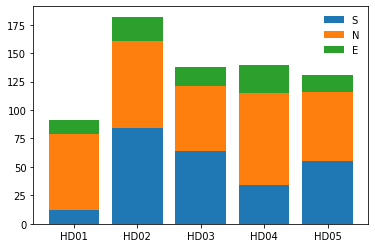

In [3]:
# Instantiate Figure and Axes, then create bar chart
fig, ax = plt.subplots()

# Create first bar for Ag S
ax.bar(df_wide['Subject'], df_wide['Ag S'], label = 'S')

# Stack Ag N on top of S, call bottom flag
ax.bar(df_wide['Subject'], df_wide['Ag N'], label = 'N', \
       bottom = df_wide['Ag S'])

# Stack Ag E on both Ag S and N, call bottom flag with np.array() to sum them all
ax.bar(df_wide['Subject'], df_wide['Ag E'], label = 'E', 
       bottom = np.array(df_wide['Ag S'])+np.array(df_wide['Ag N']))

# Put legend, to make life easier
ax.legend(frameon = False)

# Show plot
plt.show()

Now you see, it is much easier to draw stacked bar chart when the data exists in wide dataframe. Also, it is a little bit complicated if the stacking occurs multiple time due to calling the `bottom` flag at each iteration.

Now, this chart is useful. However, sometimes I would like to see percentage instead of absolute value because that would provide me some insight about the composition of response against each antigen, regardless of their absolute value. I like using `lambda` operations here.

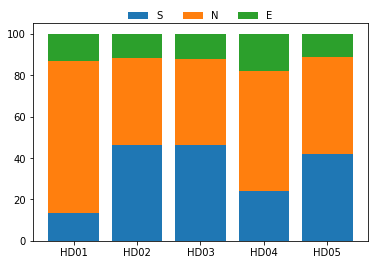

In [4]:
# Add all the response, this will be the denominator
df_wide['Total Response'] = df_wide.apply(lambda x: x['Ag S'] + x['Ag E'] + x['Ag N'], axis = 1)

# Get percentage (proportion) for each Ag-specific response. This is not an optimized code
df_wide['Pct S'] = df_wide.apply(lambda x: (x['Ag S'] / x['Total Response']) * 100, axis = 1)
df_wide['Pct N'] = df_wide.apply(lambda x: (x['Ag N'] / x['Total Response']) * 100, axis = 1)
df_wide['Pct E'] = df_wide.apply(lambda x: (x['Ag E'] / x['Total Response']) * 100, axis = 1)

# Instantiate Figure and Axes objects
fig, ax = plt.subplots()

# Re-plot. Create first bar for Pct S
ax.bar(df_wide['Subject'], df_wide['Pct S'], label = 'S')

# Stack Pct N on top of S, call bottom flag
ax.bar(df_wide['Subject'], df_wide['Pct N'], label = 'N', \
       bottom = df_wide['Pct S'])

# Stack Pct E on both Pct S and N, call bottom flag with np.array() to sum them all
ax.bar(df_wide['Subject'], df_wide['Pct E'], label = 'E', 
       bottom = np.array(df_wide['Pct S'])+np.array(df_wide['Pct N']))

# Put legend, to make life easier
ax.legend(frameon = False, loc = 'upper center', ncol = 3, bbox_to_anchor = (0.5,1.1))

# Show plot
plt.show()

So, someone on Stack Overflow was kind enough [to provide this code for printing number](https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib) within bar chart. I am going to reverse-engineer this approach.

In [5]:
"""
The function code below will first get the height, width, x, and y for each bar, 
then will create a dataframe. Using this information, we can print numbers within each stacked bar.

All of the information coming from ax.patches() call. I do not understand what a Patch is, sadly.
"""
def stack_info():
    barh = []
    barw = []
    barx = []
    bary = []
    
    # Obtain the information with ax.patches() call.
    for i in ax.patches:
        barh.append(i.get_height())
        barw.append(i.get_width())
        barx.append(i.get_x())
        bary.append(i.get_y())

    # Zip, return as dataframe
    zippedlist = list(zip(barh, barw, barx, bary))
    df_stack = pd.DataFrame(zippedlist, columns = ['Height', 'Width', 'X', 'Y'])
    
    # Return data
    return df_stack

"""
With all those information from stack_info call, we can print number now.

Luckily, information about the height of stacked bar is already within df_stack['Height']
By adding .query(' Height > 0'), this will include zero or NaN from being written onto the plot

Wrap round(df_stack['Height'][i],2) with int() if needed
"""
def stack_print_number():
    df_stack = stack_info()
    for i in df_stack.query(' Height > 0 ').index:
        ax.text(s = round(df_stack['Height'][i],2),
                x = df_stack['X'][i] + 0.8/4,
                y = df_stack['Y'][i] + df_stack['Height'][i] / 2,
                color = 'w')

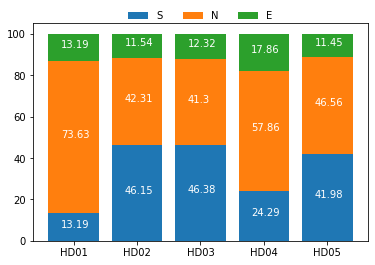

In [6]:
# Same code as above

# Instantiate Figure and Axes objects
fig, ax = plt.subplots()

# Re-plot. Create first bar for Pct S
ax.bar(df_wide['Subject'], df_wide['Pct S'], label = 'S')

# Stack Pct N on top of S, call bottom flag
ax.bar(df_wide['Subject'], df_wide['Pct N'], label = 'N', \
       bottom = df_wide['Pct S'])

# Stack Pct E on both Pct S and N, call bottom flag with np.array() to sum them all
ax.bar(df_wide['Subject'], df_wide['Pct E'], label = 'E', 
       bottom = np.array(df_wide['Pct S'])+np.array(df_wide['Pct N']))

# Put legend, to make life easier
ax.legend(frameon = False, loc = 'upper center', ncol = 3, bbox_to_anchor = (0.5,1.1))

# Print number in each bar
stack_print_number()        
        
# Show plot
plt.show()

In [7]:
# Just to check numbers with bar above
df_wide

,Subject,Ag S,Ag N,Ag E,Total Response,Pct S,Pct N,Pct E
0,HD01,12,67,12,91,13.186813,73.626374,13.186813
1,HD02,84,77,21,182,46.153846,42.307692,11.538462
2,HD03,64,57,17,138,46.376812,41.304348,12.318841
3,HD04,34,81,25,140,24.285714,57.857143,17.857143
4,HD05,55,61,15,131,41.984733,46.564885,11.450382


And, after writing all the code above, I just found out that there is a simpler way to produce stacked bar chart by using the `.plot()` method in Pandas `df` object. However, this requires the data to be pivoted first with `.pivot()` method.

To pivot data into ready-to-chart form, `index` must be something you put on the x-axis, `columns` is the (categorical) layer that you want the stack to form, and `values` is the stack height.

Use `.loc[]` after `.pivot()` call to re-arrange the layer ordering.

In simplest form, it looks like this: `df.pivot().loc[].plot()`

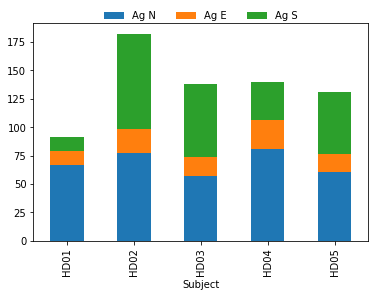

In [8]:
# Instantiate Figures and Axes objects
fig, ax = plt.subplots()

# Pivot the data, then chart, in single-line
df.pivot(index = 'Subject',
         columns = 'Antigen',
         values = 'ug/ml').loc[:,['Ag N', 'Ag E', 'Ag S']].plot(ax = ax, kind = 'bar', stacked = True, legend = None)

# Set the Legend
ax.legend(frameon = False, loc = 'upper center', bbox_to_anchor = (0.5,1.1), ncol = 3)

# Show the plot
plt.show()